In [2]:
%matplotlib notebook

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import squarify

In [3]:
#Read Q data and cleanup if any
df2017q1 = pd.read_csv('Resources/LoanStats_2017Q1.csv', low_memory=False, skiprows=1)
df2017q2 = pd.read_csv('Resources/LoanStats_2017Q2.csv', low_memory=False,skiprows=1)
df2017q3 = pd.read_csv('Resources/LoanStats_2017Q3.csv', low_memory=False, skiprows=1)
df2017q4 = pd.read_csv('Resources/LoanStats_2017Q4.csv', low_memory=False, skiprows=1)

In [4]:
df2017 = df2017q1.append([df2017q2,df2017q3,df2017q4])
# df2017 = df2017.append(df2017q3)
# df2017 = df2017.append(df2017q4)
df2017.shape

(443579, 145)

In [5]:
# Question1: Are people with bad credit irregular with payments? - Sandeep

# How do you define Bad Credit-- compare: Grade Column I and Late payment colum Q
# Correlation between bad credit and the irregular with payment 

In [6]:
df_grade_status = df2017.groupby(['grade','loan_status'])['loan_status'].count().unstack('loan_status').fillna(0)

In [7]:
# df_grade_status.astype(float)
df_grade_status['Total'] = df_grade_status.sum(axis=1)
df_grade_status = df_grade_status.astype(float)
# df_grade_status.dtypes

In [8]:
for index, row in df_grade_status.iterrows():
    row['Charged Off'] = (row['Charged Off'] / row['Total'])*100
    row['Current'] = (row['Current'] / row['Total'])*100
    row['Default'] = (row['Default'] / row['Total'])*100
    row['Fully Paid'] = (row['Fully Paid'] / row['Total'])*100
    row['In Grace Period'] = (row['In Grace Period'] / row['Total'])*100
    row['Late (16-30 days)'] = (row['Late (16-30 days)'] / row['Total'])*100
    row['Late (31-120 days)'] = (row['Late (31-120 days)'] / row['Total'])*100
del df_grade_status['Total']
df_grade_status

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,
A,1.243718,75.597746,0.024113,21.923702,0.439109,0.166252,0.605361
B,3.039203,73.140685,0.077370,21.112171,0.770693,0.393609,1.466269
C,5.703991,69.174751,0.115058,20.660861,1.198120,0.717219,2.430001
D,8.839106,63.300145,0.190658,21.413692,1.585284,0.962116,3.709000
E,13.631180,54.420588,0.208261,24.391332,1.780136,1.125601,4.442902
F,19.128484,45.738545,0.192246,25.937200,2.066645,1.425825,5.511054
G,21.752965,42.001736,0.202488,26.034134,2.458779,1.185999,6.363899


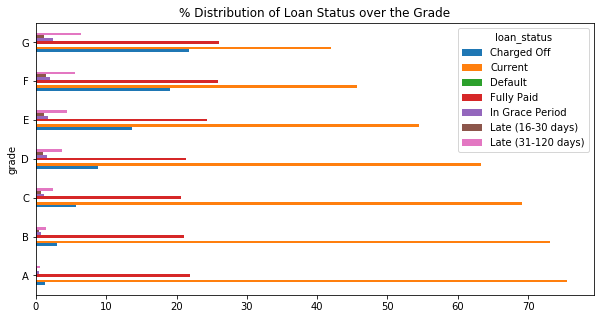

In [9]:
chrt1=df_grade_status.plot(kind='barh',figsize=(10,5),title='% Distribution of Loan Status over the Grade')

In [10]:
# Purposes of the loan (column U) Why and how much do people borrow? - Sandeep

In [12]:
df_purpose = df2017.groupby(['purpose'])['loan_amnt'].count()
# df_purpose

In [13]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [14]:
purpose=df_purpose.index.get_level_values("purpose")
labels=np.array(purpose)

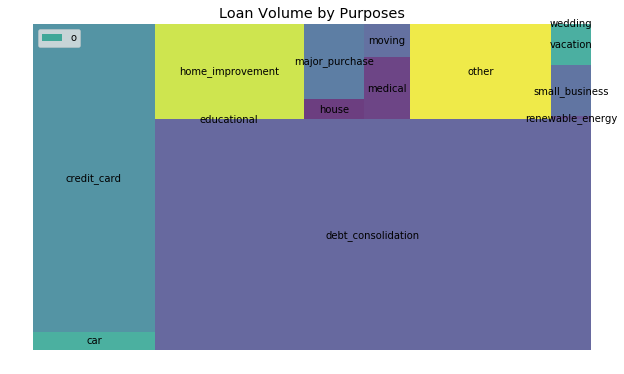

<Figure size 720x432 with 0 Axes>

In [15]:
squarify.plot(sizes=df_purpose, label=labels, alpha=.8 )
plt.axis('off')
plt.legend('off')
plt.title('Loan Volume by Purposes')
plt.show()
plt.savefig('Loan_Volume_by_purposes')

In [16]:
df_purpose = df2017.groupby(['purpose'])['loan_amnt'].sum()

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [18]:
purpose=df_purpose.index.get_level_values("purpose")
labels=np.array(purpose)

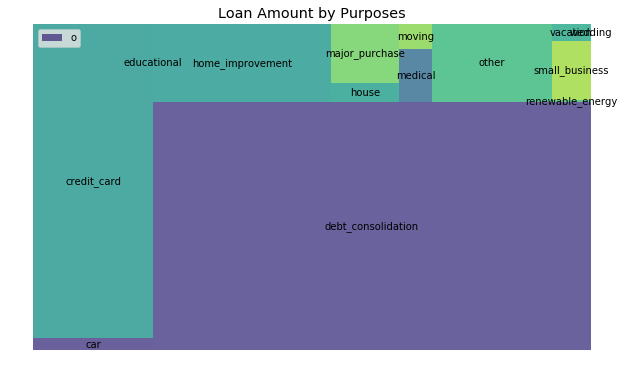

<Figure size 720x432 with 0 Axes>

In [19]:
squarify.plot(sizes=df_purpose, label=labels, alpha=.8 )
plt.axis('off')
plt.legend('off')
plt.title('Loan Amount by Purposes')
plt.show()
plt.savefig('Loan_Amount_by_purposes')

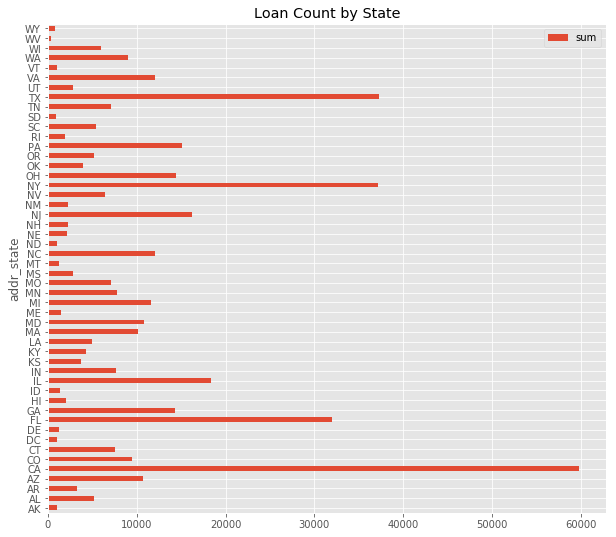

In [29]:
# Count of loans by State
df_states = df2017.groupby(["addr_state"])["loan_amnt"].count().reset_index(name="sum")
df_states = df_states.set_index('addr_state')
barlot = df_states.plot(kind='barh', figsize=(10,9), title='Loan Count by State')
# df_states

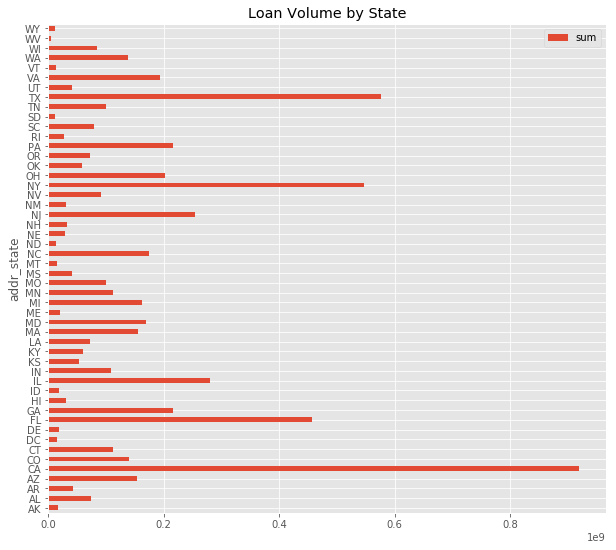

In [30]:
# Volume of loans by State
df_states = df2017.groupby(["addr_state"])["loan_amnt"].sum().reset_index(name="sum")
df_states = df_states.set_index('addr_state')
barlot = df_states.plot(kind='barh', figsize=(10,9), title='Loan Volume by State')

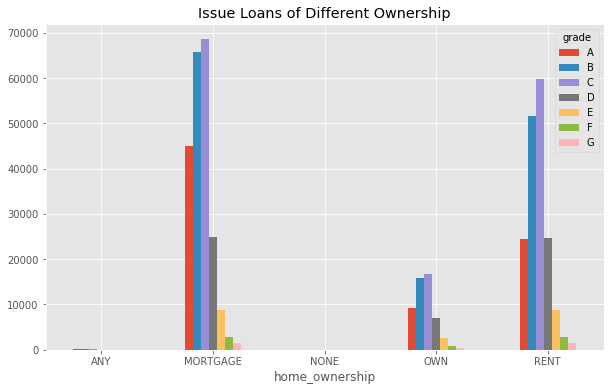

In [32]:
# Grade and Homeownership: Are the grade given to leander based on long-standing credit history? 
df_grade_status = df2017.groupby(['grade','home_ownership'])['loan_status'].count().unstack('grade').fillna(0)
# df_grade_status
barplot1=df_grade_status.plot(kind='bar',rot=0,title='Issue Loans of Different Ownership')